# 第8章: 機械学習
本章では，Bo Pang氏とLillian Lee氏が公開しているMovie Review Dataのsentence polarity dataset v1.0を用い，文を肯定的（ポジティブ）もしくは否定的（ネガティブ）に分類するタスク（極性分析）に取り組む．
### 70. データの入手・整形
文に関する極性分析の正解データを用い、以下の要領で正解データ(sentiment.txt)を作成せよ。
1. rt-polarity.posの各行の先頭に"+1 "という文字列を追加する（極性ラベル"+1"とスペースに続けて肯定的な文の内容が続く）
2. rt-polarity.negの各行の先頭に"-1 "という文字列を追加する（極性ラベル"-1"とスペースに続けて否定的な文の内容が続く）
3. 上述1と2の内容を結合（concatenate）し，行をランダムに並び替える

sentiment.txtを作成したら，正例（肯定的な文）の数と負例（否定的な文）の数を確認せよ．

In [1]:
import random

pos_sent = open('./resource/rt-polaritydata/rt-polarity.pos','r',encoding='cp1252')
neg_sent = open('./resource/rt-polaritydata/rt-polarity.neg','r',encoding='cp1252')
temp_pos_sentList = []
temp_neg_sentList = []
for pos in pos_sent:
    temp_pos_sentList.append("+1 "+pos)
for neg in neg_sent:
    temp_neg_sentList.append("-1 "+neg)
    
sentList = temp_pos_sentList + temp_neg_sentList
random.shuffle(sentList)

with open('./resource/sentiment.txt','w') as ret_file:
    ret_file.writelines(sentList)
    
    
pos_count = 0
neg_count = 0
with open('./resource/sentiment.txt','r') as check_file:
    for line in check_file:
        if line[0:2] == "+1":
            pos_count += 1
        else:
            neg_count += 1
print(pos_count, neg_count)

5331 5331


### 71. ストップワード
英語のストップワードのリスト(ストップリスト)を適当に作成せよ。さらに、引数に与えられた単語(文字列)がストップワードに含まれている場合は真、それ以外は偽を返す関数を実装せよ。さらに、その関数に対するテストを記述せよ。

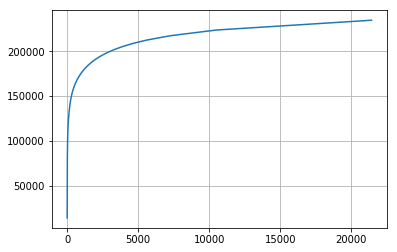

In [2]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file = open('./resource/sentiment.txt','r')
sentList = file.readlines()
sentList = " ".join(sentList).split()
WordTimesAppear = Counter(sentList).most_common()
Word_Df = pd.DataFrame(WordTimesAppear)
Word_Df.columns = ["word", "times"]
Word_Df['times'].cumsum().plot()
plt.grid(True)
plt.show()

In [3]:
#150000あたりまでは切っていい

In [4]:
Word_Df['times'].cumsum()[300]

150220

In [5]:
StopWordList = list(zip(*Counter(sentList).most_common()[:313]))[0]
print(StopWordList)

('.', 'the', ',', 'a', 'and', 'of', '-1', '+1', 'to', 'is', 'in', 'that', 'it', 'as', 'but', 'with', 'film', 'this', 'for', 'its', 'an', 'movie', "it's", 'be', 'on', 'you', 'not', 'by', 'about', 'more', 'one', 'like', 'has', 'are', 'at', 'from', 'than', '"', 'all', '--', 'his', 'have', 'so', 'if', 'or', 'story', 'i', 'too', 'just', 'who', 'into', 'what', 'most', 'out', 'no', 'much', 'even', 'good', 'up', 'will', 'comedy', 'time', 'can', 'some', 'characters', 'only', 'little', 'way', 'their', 'funny', 'make', 'enough', 'been', 'very', 'your', 'never', 'when', 'makes', 'there', 'may', 'which', 'us', 'work', 'best', 'he', 'bad', 'director', "doesn't", ')', '?', 'any', '(', 'love', 'would', 'life', 'while', 'they', 'we', ':', 'was', "there's", 'movies', 'new', 'well', 'her', 'through', 'could', 'really', 'something', 'how', 'made', 'them', 'does', 'performances', 'own', 'should', 'many', 'drama', "that's", 'those', 'plot', 'look', 'films', "isn't", 'every', 'see', 'still', 'two', 'nothing'

引数に与えられた単語（文字列）がストップリストに含まれている場合は真  
それ以外は偽を返す関数

In [6]:
def isStopWord(word):
    if word in StopWordList:
        return True
    else:
        return False

In [7]:
import numpy as np
np.array(Word_Df[Word_Df['word'].apply(isStopWord)][300:320])

array([['simply', 72],
       ['high', 72],
       ['mr', 72],
       ['direction', 72],
       ['silly', 71],
       ['dark', 71],
       ['instead', 71],
       ['predictable', 70],
       ['charm', 70],
       ['him', 70],
       ['whose', 70],
       ['care', 70],
       ['actually', 70]], dtype=object)

### 72. 素性抽出
極性分析に有用そうな素性を各自で設計し、学習データから素性を抽出せよ。素性としては、レビューからストップワードを除去し、各単語をステミング処理したものが最低限のベースになるであろう。  
skilearnのモジュール  
CountVectorizer:
param
- Input filename or file or content
- tokenizer callable object, 関数を渡して、処理する？？
- stop_words
- ngram_range これを増やすと、n_gram単位でベクトル化してくれる  
使用例

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')


Stemmer = PorterStemmer()

#文を渡してsteming処理を行う関数
def token_processing(text):
    return [Stemmer.stem(token) for token in text.split()]
                 
    
judge_texts = ["the film's unhurried pace is actually one of its strengths . entirely appropriately , the tale unfolds like a lazy summer afternoon and concludes with the crisp clarity of a fall dawn . ",
       "the chateau belongs to rudd , whose portrait of a therapy-dependent flakeball spouting french malapropisms . . . is a nonstop hoot . "]

CV = CountVectorizer(tokenizer=token_processing, stop_words=StopWordList)
temp_X = CV.fit_transform(judge_texts)
Df = pd.DataFrame(temp_X.toarray())
Df.columns = CV.get_feature_names()
Df

,actual,afternoon,appropri,belong,chateau,clariti,conclud,crisp,dawn,entir,...,nonstop,pace,portrait,rudd,spout,strength,summer,therapy-depend,unfold,unhurri
0,1,1,1,0,0,1,1,1,1,1,...,0,1,0,0,0,1,1,0,1,1
1,0,0,0,1,1,0,0,0,0,0,...,1,0,1,1,1,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

file = open('./sentiment.txt','r')
temp = file.readlines()
texts = list(map(lambda x:x[2:], temp))
labels = np.array(list(map(lambda x:int(x[0:2]), temp)))
CV = CountVectorizer(tokenizer=token_processing, stop_words=StopWordList)
LR = LogisticRegression()
Vectorized_text = CV.fit_transform(texts).toarray()
clf = LR.fit(Vectorized_text, labels)

In [ ]:
clf.score(Vectorized_text, labels)

### 74. 予測
73で学習したロジスティック回帰モデルを用い、与えられた文の極性ラベル(正例なら"+1", 負例なら"-1")とその予測確率を計算するプログラムを実装せよ

In [ ]:
clf.predict_proba(Vectorized_text)[0:10]

### 75.  素性の重み
73で学習したロジスティック回帰モデルの中で，重みの高い素性トップ10と，重みの低い素性トップ10を確認せよ．

In [ ]:
print("GOOD WORD\n")
for i in np.argsort(clf.coef_[0])[::-1][:10]:
    print("Word: {}\t\t Weight:{}".format(CV.get_feature_names()[i], clf.coef_[0][i]))
    
print("\nBAD WORD\n")
for i in np.argsort(clf.coef_[0])[:10]:
    print("Word: {}\t\t Weight:{}".format(CV.get_feature_names()[i], clf.coef_[0][i]))

### 76. ラベル付け
学習データに対し、ロジスティック回帰モデルを適用し、正解のラベル、予測されたラベル、予測確率をタブ区切り形式で出力せよ

In [ ]:
print(Vectorized_text.shape)
print(Vectorized_text[0].reshape(1,-1).shape)
clf.predict_proba(Vectorized_text[0].reshape(1,-1))[0]

In [ ]:
file = open('./resource/sentiment.txt', 'r').readlines()
Ans76List = []
for text, Vectorize in zip(file, Vectorized_text):
    Correct_Label = int(text[0:2])
    Predict_Label = clf.predict(Vectorize.reshape(1,-1))[0]
    Predict_Prob = max(clf.predict_proba(Vectorize.reshape(1,-1))[0])
    Ans76List.append([Correct_Label, Predict_Label])
    print("Correct_Label:{}, Predict_Label:{}, Predict_Prob:{:.2f}".format(Correct_Label, Predict_Label, Predict_Prob))
    

### 77. 正解率の計測
76の出力を受け取り、予測の正解率、正例に関する適合率、再現率、F1スコアを求めるプログラムを作成せよ.

In [ ]:
#正例に関する適合率
TP = 0
TN = 0
FP = 0
FN = 0
for i in Ans76List:
    if i[0] == 1:
        if i[1]==1:
            TP += 1
        else:
            FN += 1
    else:
        if i[1] == 1:
            FP += 1
        else:
            TN += 1
            
Correct = (TP+TN)/len(Ans76List)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
print("正解率:",Correct)
print("正例適合率:", Precision)
print("再現率:", Recall)
print("F1スコア:", 2*Precision*Recall/(Recall+Precision))

In [ ]:
print("{}, {}\n{}, {}".format(TN, FP, FN, TP))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(labels, clf.predict(Vectorized_text))
print(conf_matrix)
count = sum(sum(conf_matrix))
print("正解率:", (conf_matrix[0][0]+conf_matrix[1][1])/count)
print("正例適合率:", conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1]))
print("再現率:", conf_matrix[1][1]/ (conf_matrix[1][1]+conf_matrix[1][0]))

|||
|-|-|
|5080|251|
|316|5015|
5080が真陽性

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
predict_labels = clf.predict(Vectorized_text)
print(clf.score(Vectorized_text, labels))
print(precision_score(labels, predict_labels))
print(recall_score(labels, predict_labels))
print(f1_score(labels, predict_labels))

### 78. 5分割交差検定
76-77の実験では，学習に用いた事例を評価にも用いたため，正当な評価とは言えない．すなわち，分類器が訓練事例を丸暗記する際の性能を評価しており，モデルの汎化性能を測定していない．そこで，5分割交差検定により，極性分類の正解率，適合率，再現率，F1スコアを求めよ．

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

print("precision\trecall\tf1")
skfolds = StratifiedKFold(n_splits=5)
for train_index, test_index in skfolds.split(Vectorized_text, labels):
    temp_clf = LogisticRegression()
    Train_Vectorized_text_fold = Vectorized_text[train_index]
    Train_Label_fold = labels[train_index]
    Test_Vectorized_text_fold = Vectorized_text[test_index]
    Test_Label_fold = labels[test_index]
    
    temp_clf.fit(Train_Vectorized_text_fold, Train_Label_fold)
    label_predict = temp_clf.predict(Test_Vectorized_text_fold)
    
    precision = precision_score(Test_Label_fold, label_predict)
    recall = recall_score(Test_Label_fold, label_predict)
    f1 = f1_score(Test_Label_fold, label_predict)
    
    print("{:.2f}\t\t{:.2f}\t{:.2f}".format(precision, recall, f1))
    

### 79. 適合率-再現率グラフの描画
ロジスティック回帰モデルの分類の閾値を変化させることで、適合率-再現率を描画せよ

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_prob = clf.predict_proba(Vectorized_text)
# print(y_prob[:,1:2])
# print(labels[0:3])
p, r, t = precision_recall_curve(labels, y_prob[:, 1:2])


In [ ]:
df = pd.DataFrame(data={"precision": p, "recall": r}) 
df.plot(x="precision",y="recall")
plt.grid(True)
plt.show()

In [ ]:
y_prob[:, 1:2]

In [ ]:
labels

In [ ]:
df.plot()
plt.show()